<a href="https://colab.research.google.com/github/Angie290199/Plastic-and-fashion-project/blob/main/Graficas_P%26F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cargar las librerias y los datos

### Subtarea
Asegurarnos de que las librerias se instalen correctamente y los datos del archivo "/content/Plastic based Textiles in clothing industry.csv" se carguen correctamente en un DataFrame de pandas.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
try:
    df = pd.read_csv('Plastic based Textiles in clothing industry.csv')
except FileNotFoundError:
    print("Error: El archivo 'Plastic based Textiles in clothing industry (1).csv' no fue encontrado.")
    print("Asegúrate de haber subido el archivo a tu sesión de Google Colab.")
    exit()

# Renombrar las columnas para un acceso más fácil
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('?', '_').str.replace('tCO_e_yr', 'tCO2e_yr')


## Exploración inicial de los datos

### Subtarea:
Obtener un resumen de la estructura del DataFrame, tipos de datos, columnas, filas, y verificar si hay valores faltantes.


**Explicación**:
Muestrear la información y la forma del marco de datos y comprobar si faltan valores.



In [ ]:
# 1. Muestra los nombres de las columnas y sus tipos de datos.
df.info()

# 2. Muestra el número de filas y columnas.
print("\nShape of the DataFrame:")
print(df.shape)

# 3. Comprueba si faltan valores en cada columna.
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Company                            6956 non-null   object
 1   Product_Type                       6956 non-null   object
 2   Production_Year                    6956 non-null   int64 
 3   Category                           6956 non-null   object
 4   Greenhouse_Gas_Emissions_tCO2e_yr  6956 non-null   int64 
 5   Pollutants_Emitted_Ton_yr          6956 non-null   int64 
 6   Water_Consumption_M3_yr            6956 non-null   int64 
 7   Energy_Consumption_MWh_yr          6956 non-null   int64 
 8   Waste_Generation_Ton_yr            6956 non-null   int64 
 9   Sales_Revenue_USD                  6956 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 543.6+ KB

Shape of the DataFrame:
(6956, 10)

Missing values per column:
Company              

## Análisis descriptivo de las variables numéricas

### Subtarea:
Calcular estadísticas básicas (media, mediana, desviación estándar, etc.) para las columnas numéricas para entender su distribución.


In [ ]:
# 1. Análisis de Medidas de Tendencia Central
print("--- Medidas de Tendencia Central ---")
numeric_cols = ['Greenhouse_Gas_Emissions_tCO2e_yr', 'Pollutants_Emitted_Ton_yr', 'Water_Consumption_M3_yr', 'Energy_Consumption_MWh_yr', 'Waste_Generation_Ton_yr', 'Sales_Revenue_USD']
for col in numeric_cols:
    print(f"\nColumna: {col}")
    print(f"  Media: {df[col].mean():.2f}")
    print(f"  Mediana: {df[col].median():.2f}")
    print(f"  Moda: {df[col].mode().iloc[0]:.2f}" if not df[col].mode().empty else "No hay moda única")



--- Medidas de Tendencia Central ---

Columna: Greenhouse_Gas_Emissions_tCO2e_yr
  Media: 3891.25
  Mediana: 3876.50
  Moda: 4647.00

Columna: Pollutants_Emitted_Ton_yr
  Media: 16.99
  Mediana: 17.00
  Moda: 21.00

Columna: Water_Consumption_M3_yr
  Media: 5983.97
  Mediana: 5943.00
  Moda: 5067.00

Columna: Energy_Consumption_MWh_yr
  Media: 1106.56
  Mediana: 1112.00
  Moda: 1123.00

Columna: Waste_Generation_Ton_yr
  Media: 248.89
  Mediana: 249.00
  Moda: 288.00

Columna: Sales_Revenue_USD
  Media: 510234.84
  Mediana: 510494.00
  Moda: 437290.00


## Visualización de datos clave

### Subtarea:
Crear gráficos (histogramas, gráficos de barras, diagramas de dispersión, etc.) para visualizar las distribuciones, relaciones y tendencias en los datos.


### **GRAFICA 1: ACUMULADO % POR EMPRESA Y TIPO DE PRODUCTO DEL 2018 A 2022**

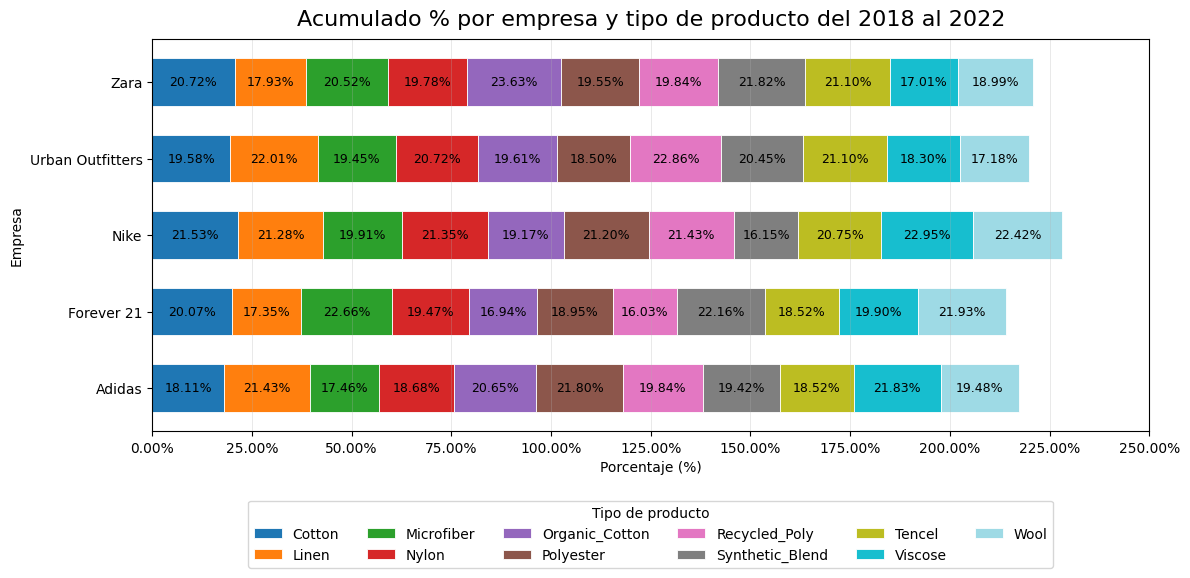

In [ ]:
# ==== SOLO PLOT (mejorado) ====
import numpy as np

# límite X = al máximo que suma cada barra (no al # de columnas*100)
row_totals = tabla.sum(axis=1)                   # % acumulado por empresa
xmax = float(np.ceil(row_totals.max() / 25) * 25)  # redondea al múltiplo de 25 más cercano

ax = tabla.plot(
    kind='barh', stacked=True, figsize=(12, 6),
    cmap='tab20', width=0.62, edgecolor='white', linewidth=0.6
)

# Etiquetas centradas: muéstralas solo si el segmento ocupa ≥6% de su barra
totals = row_totals.values
for cont in ax.containers:
    seg = cont.datavalues
    labels = [f'{v:.2f}%' if v >= 0.06*t else '' for v, t in zip(seg, totals)]
    ax.bar_label(cont, labels=labels, label_type='center', fontsize=9, color='black')

# Eje X y estilo (parecido a Excel)
ax.set_xlim(0, xmax)
ticks = np.arange(0, xmax + 0.1, 25)
ax.set_xticks(ticks)
ax.set_xticklabels([f'{t:.2f}%' for t in ticks])

ax.set_title('Acumulado % por empresa y tipo de producto del 2018 al 2022', fontsize=16, pad=10)
ax.set_xlabel('Porcentaje (%)'); ax.set_ylabel('Empresa')
ax.grid(axis='x', linestyle='-', linewidth=0.4, alpha=0.5)
ax.invert_yaxis()  # si quieres Zara arriba como en tu lámina

# Leyenda abajo en varias columnas
ax.legend(title='Tipo de producto', loc='upper center', bbox_to_anchor=(0.5, -0.16),
          ncol=min(6, len(tabla.columns)), frameon=True)

plt.tight_layout()
plt.show()




### **GRAFICA 2: ACUMULADO % POR EMPRESA Y TIPO DE PRODUCTO DEL 2018 A 2022**

/tmp/ipython-input-3665372297.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/tmp/ipython-input-3665372297.py:26: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


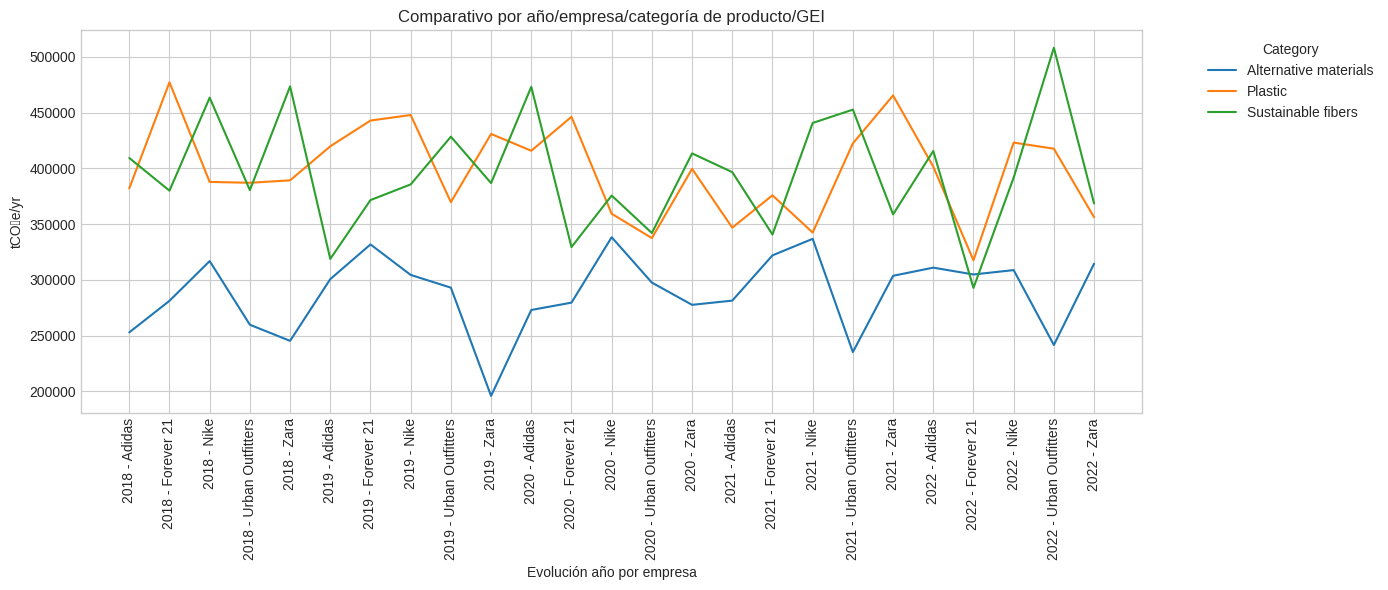

In [ ]:
#GRAFICA 2
tabla = df.groupby(
    ['Production_Year', 'Company', 'Category']
)['Greenhouse_Gas_Emissions_tCO2e_yr'].sum().reset_index()

# Combinar Año + Empresa en una sola columna para el eje X
tabla['Year_Company'] = tabla['Production_Year'].astype(str) + " - " + tabla['Company']

plt.figure(figsize=(14,6))

sns.lineplot(
    data=tabla,
    x='Year_Company',
    y='Greenhouse_Gas_Emissions_tCO2e_yr',
    hue='Category',
    markers=True,
    dashes=False,
    ci=None
)

plt.title('Comparativo por año/empresa/categoría de producto/GEI')
plt.ylabel('tCO₂e/yr')
plt.xlabel('Evolución año por empresa')
plt.xticks(rotation=90)
plt.legend(title='Category', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()



### **GRAFICA 3: ACUMULADO DE EMISION DE BASURAS DE LAS EMPRESAS ENTRE 2018 Y 2022**

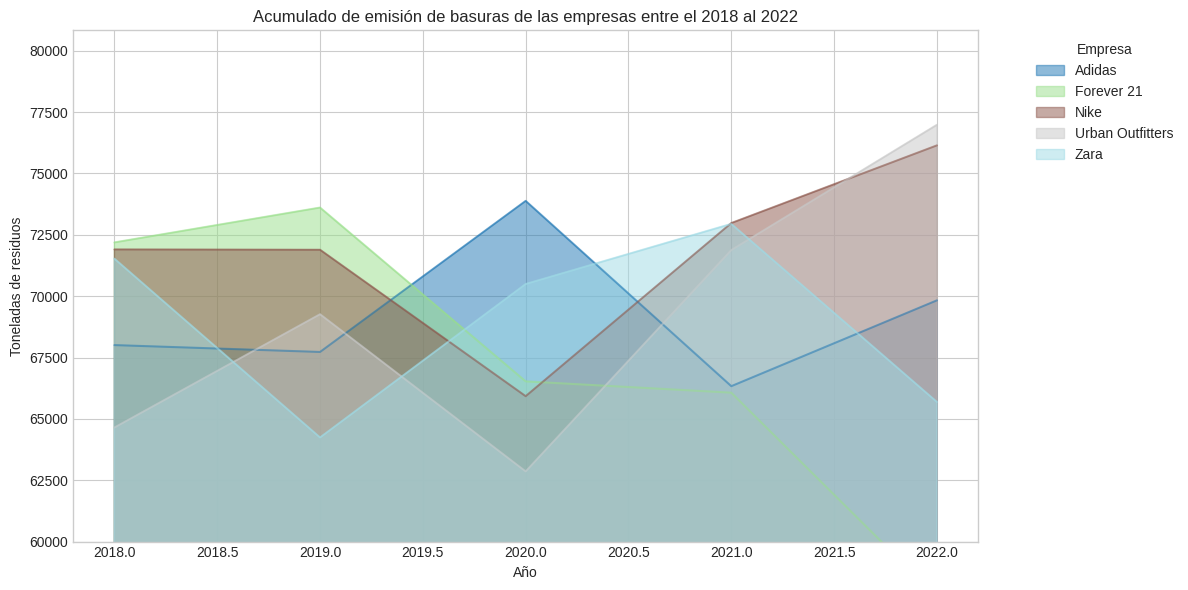

In [ ]:
#GRAFICA 3
tabla = df.pivot_table(
    index='Production_Year',
    columns='Company',
    values='Waste_Generation_Ton_yr',
    aggfunc='sum'
).fillna(0)

ax = tabla.plot(kind='area', stacked=False, figsize=(12,6), cmap='tab20')
plt.title('Acumulado de emisión de basuras de las empresas entre el 2018 al 2022')
plt.ylabel('Toneladas de residuos')
plt.xlabel('Año')
plt.ylim(60000, None)
plt.legend(title='Empresa', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()





### **GRAFICA 4: TOTAL CONSUMO DE AGUA EN M3 POR EMPRESA ENTRE 2018 A 2022**

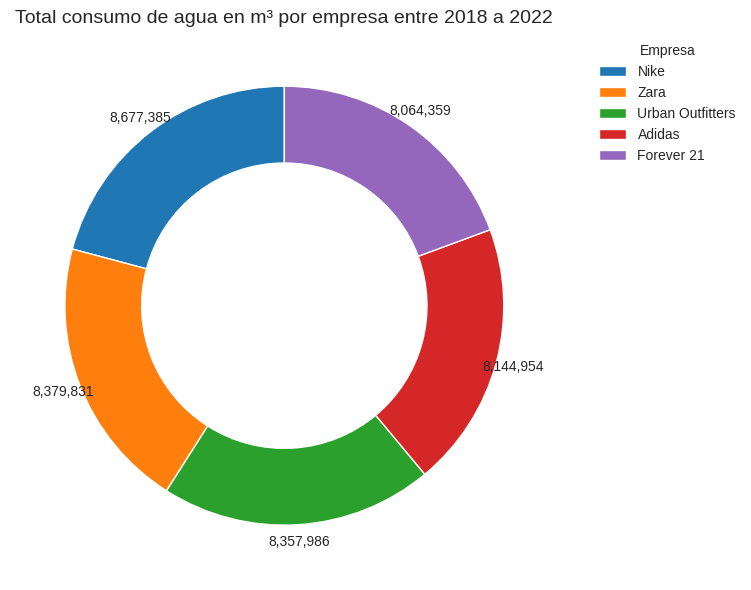

In [ ]:
#GRAFICA 4
# (Asegurar numérica por si viene como texto)
df['Water_Consumption_M3_yr'] = pd.to_numeric(df['Water_Consumption_M3_yr'], errors='coerce')

# Totales por empresa 2018–2022
mask = (df['Production_Year'] >= 2018) & (df['Production_Year'] <= 2022)
totales = (df.loc[mask]
             .groupby('Company')['Water_Consumption_M3_yr']
             .sum()
             .sort_values(ascending=False))

# Donut
fig, ax = plt.subplots(figsize=(12, 6))
S = totales.sum()
wedges, texts, autotexts = ax.pie(
    totales.values,
    labels=None,
    startangle=90,
    autopct=lambda p: f"{int(round(p/100*S)):,}",  # valores absolutos con separador de miles
    pctdistance=1.08,
    wedgeprops=dict(width=0.35, edgecolor='white')
)

ax.set(aspect='equal')
plt.title('Total consumo de agua en m³ por empresa entre 2018 a 2022', fontsize=14)

# Leyenda a la derecha con nombres de empresa
plt.legend(wedges, totales.index, title='Empresa', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()




### **GRAFICA 5: GANANCIAS PROMEDIO POR CADA EMPRESA ENTRE 2018 A 2022**

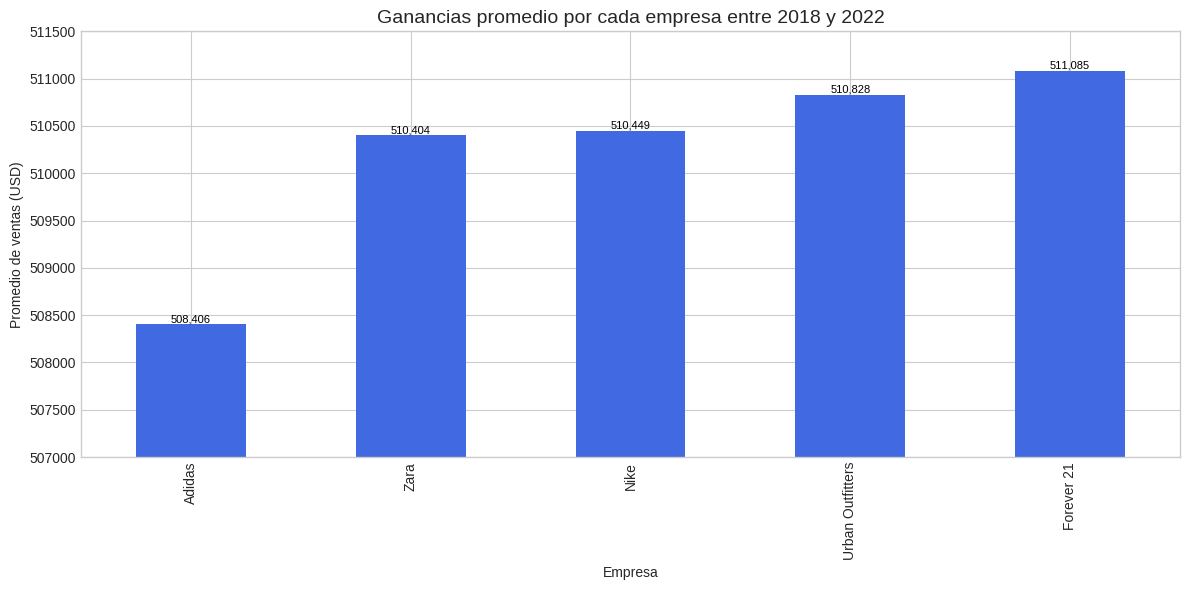

In [ ]:
#GRAFICA 5
#GRAFICA 3
#grafica 3 average revenue:
# Promedio de ganancias por empresa (2018–2022)

# Asegurar que la columna sea numérica
df['Sales_Revenue_USD'] = pd.to_numeric(df['Sales_Revenue_USD'], errors='coerce')

# Tabla de promedios sin modificar df
mask = (df['Production_Year'] >= 2018) & (df['Production_Year'] <= 2022)
tabla = (df.loc[mask]
           .groupby('Company')['Sales_Revenue_USD']
           .mean()
           .sort_values(ascending=True))

# Gráfico de barras verticales
ax = tabla.plot(kind='bar', figsize=(12, 6), color='royalblue')

# Etiquetas numéricas en cada barra (separador de miles)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=8, color='black')

plt.title('Ganancias promedio por cada empresa entre 2018 y 2022', fontsize=14)
plt.xlabel('Empresa')
plt.ylabel('Promedio de ventas (USD)')
plt.ylim(507000, 511500)
plt.tight_layout()
plt.show()


### **GRAFICA 6: MATERIALES QUE GENERAN MAYORES EMISIONES DE GEI**

/tmp/ipython-input-3022884345.py:41: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


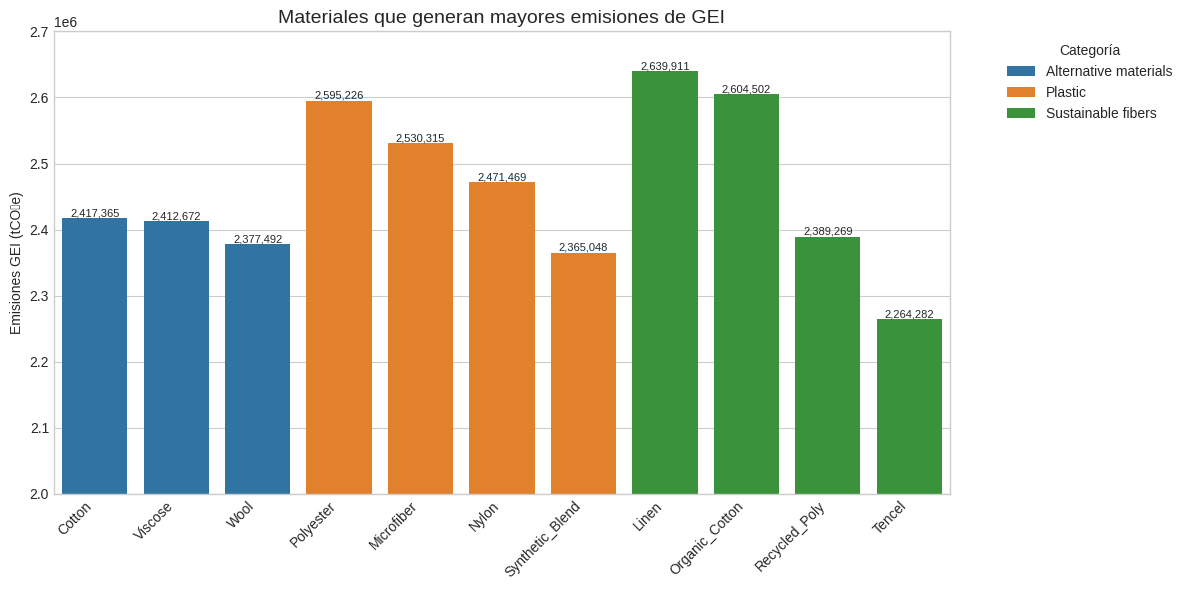

In [ ]:
#GRAFICA 6
#GRAFICA 4
#grafica 4 GEI por material y categoría directo del dataset

# Asegurar que la columna es numérica
df['Greenhouse_Gas_Emissions_tCO2e_yr'] = pd.to_numeric(
    df['Greenhouse_Gas_Emissions_tCO2e_yr'], errors='coerce'
)

# Totales de emisiones por tipo y categoría (2018–2022)
mask = (df['Production_Year'] >= 2018) & (df['Production_Year'] <= 2022)
tabla = (df.loc[mask]
           .groupby(['Product_Type','Category'])['Greenhouse_Gas_Emissions_tCO2e_yr']
           .sum()
           .reset_index()
           .sort_values(['Category','Greenhouse_Gas_Emissions_tCO2e_yr'], ascending=[True,False]))

# Gráfico de barras (Product_Type en el eje X, con categoría al pie)
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=tabla,
    x='Product_Type',
    y='Greenhouse_Gas_Emissions_tCO2e_yr',
    hue='Category',
    dodge=False,
    palette='tab10'
)

# Etiquetas de valores encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

plt.title('Materiales que generan mayores emisiones de GEI', fontsize=14)
plt.xlabel('')
plt.ylabel('Emisiones GEI (tCO₂e)')
plt.ylim(2000000, 2700000)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoría', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()




### **GRAFICA 7: MATERIALES QUE GENERAN MAS GANANCIAS**

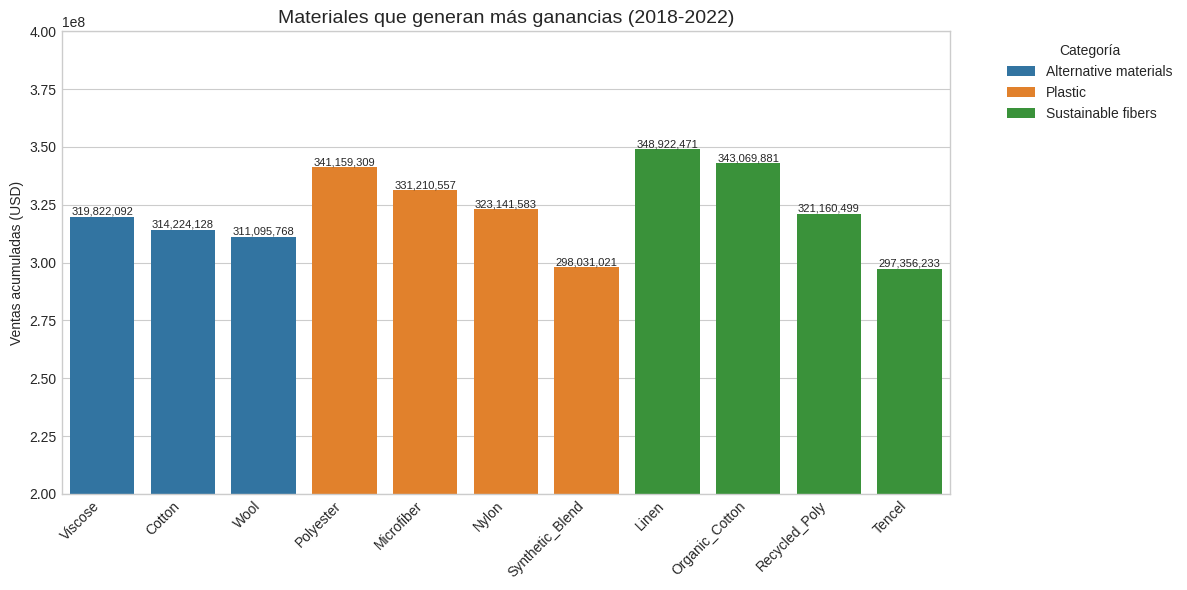

In [ ]:
#GRAFICA 7
#GRAFICA 5
#grafica 5 materiales con más ganancias por tipo y categoría

# Asegurar numérico
df['Sales_Revenue_USD'] = pd.to_numeric(df['Sales_Revenue_USD'], errors='coerce')

# Totales de ventas por tipo y categoría (2018–2022)
mask = (df['Production_Year'] >= 2018) & (df['Production_Year'] <= 2022)
tabla = (df.loc[mask]
           .groupby(['Product_Type','Category'])['Sales_Revenue_USD']
           .sum()
           .reset_index()
           .sort_values(['Category','Sales_Revenue_USD'], ascending=[True,False]))

# Gráfico
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=tabla,
    x='Product_Type',
    y='Sales_Revenue_USD',
    hue='Category',
    dodge=False,
    palette='tab10'
)

# Etiquetas de valores arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

plt.title('Materiales que generan más ganancias (2018-2022)', fontsize=14)
plt.xlabel('')
plt.ylabel('Ventas acumuladas (USD)')
plt.ylim(200000000, 400000000)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoría', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


### **GRAFICA 8: MATERIALES QUE GENERAN MAS CONTAMINANTES**

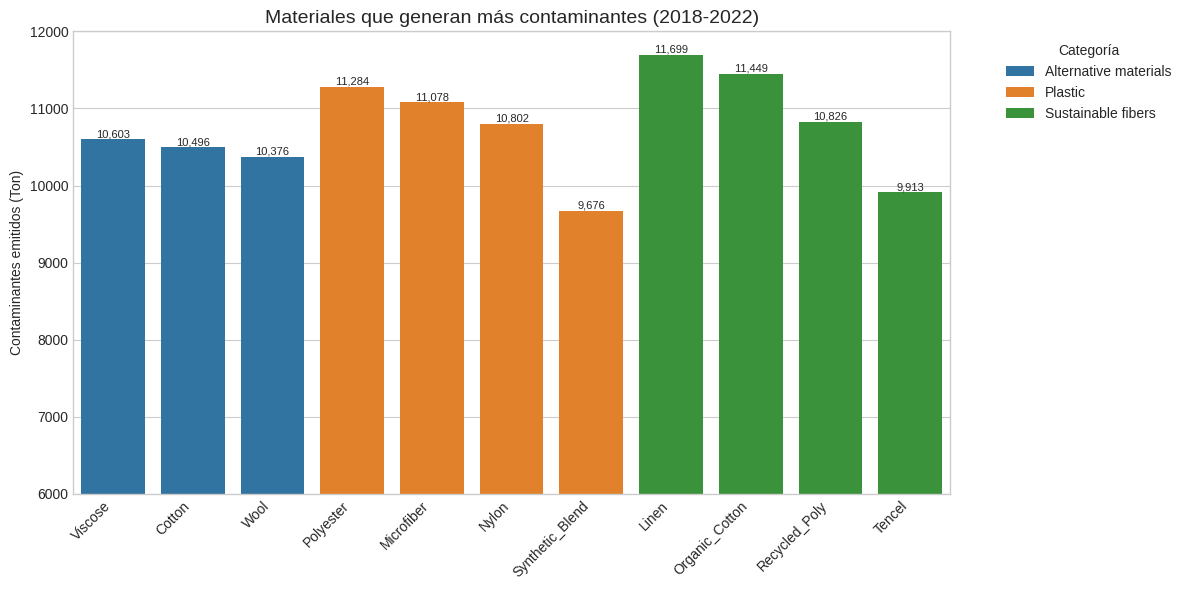

In [ ]:
#GRAFICA 8


# Asegurar numérico
df['Pollutants_Emitted_Ton_yr'] = pd.to_numeric(df['Pollutants_Emitted_Ton_yr'], errors='coerce')

# Totales de contaminantes por tipo y categoría (2018–2022)
mask = (df['Production_Year'] >= 2018) & (df['Production_Year'] <= 2022)
tabla = (df.loc[mask]
           .groupby(['Product_Type','Category'])['Pollutants_Emitted_Ton_yr']
           .sum()
           .reset_index()
           .sort_values(['Category','Pollutants_Emitted_Ton_yr'], ascending=[True,False]))

# Gráfico de barras subdividido por categoría
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=tabla,
    x='Product_Type',
    y='Pollutants_Emitted_Ton_yr',
    hue='Category',
    dodge=False,
    palette='tab10'
)

# Etiquetas de valores arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

plt.title('Materiales que generan más contaminantes (2018-2022)', fontsize=14)
plt.xlabel('')
plt.ylabel('Contaminantes emitidos (Ton)')
plt.ylim(6000, 12000)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoría', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


### **GRAFICA 9: MATERIALES QUE GENERAN MAS BASURA**

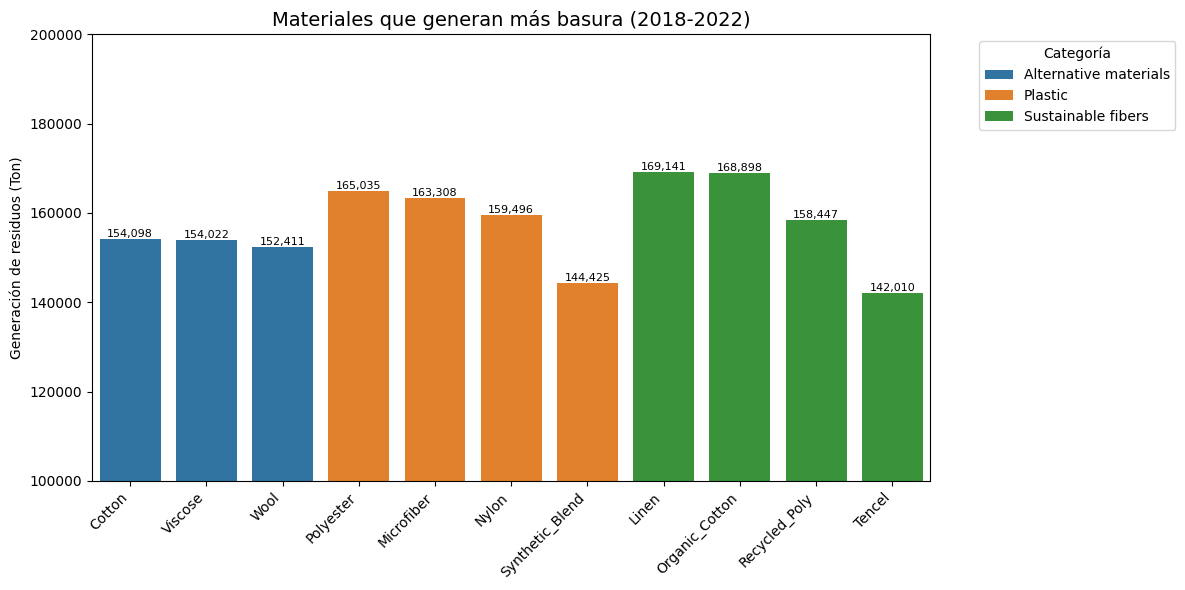

In [ ]:
#GRAFICA 9
#GRAFICA 8
#grafica 8 materiales que generan más basura por tipo y categoría

# Asegurar numérico
df['Waste_Generation_Ton_yr'] = pd.to_numeric(df['Waste_Generation_Ton_yr'], errors='coerce')

# Totales de residuos por tipo de material y categoría (2018–2022)
mask = (df['Production_Year'] >= 2018) & (df['Production_Year'] <= 2022)
tabla = (df.loc[mask]
           .groupby(['Product_Type','Category'])['Waste_Generation_Ton_yr']
           .sum()
           .reset_index()
           .sort_values(['Category','Waste_Generation_Ton_yr'], ascending=[True,False]))

# Gráfico de barras subdividido por categoría
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=tabla,
    x='Product_Type',
    y='Waste_Generation_Ton_yr',
    hue='Category',
    dodge=False,
    palette='tab10'
)

# Etiquetas de valores arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

plt.title('Materiales que generan más basura (2018-2022)', fontsize=14)
plt.xlabel('')
plt.ylabel('Generación de residuos (Ton)')
plt.ylim(100000, 200000)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoría', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


### **GRAFICA 10: GANANCIAS GENERADAS POR CATEGORIA DE PRODUCTO POR AÑO**

/tmp/ipython-input-3563797630.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(


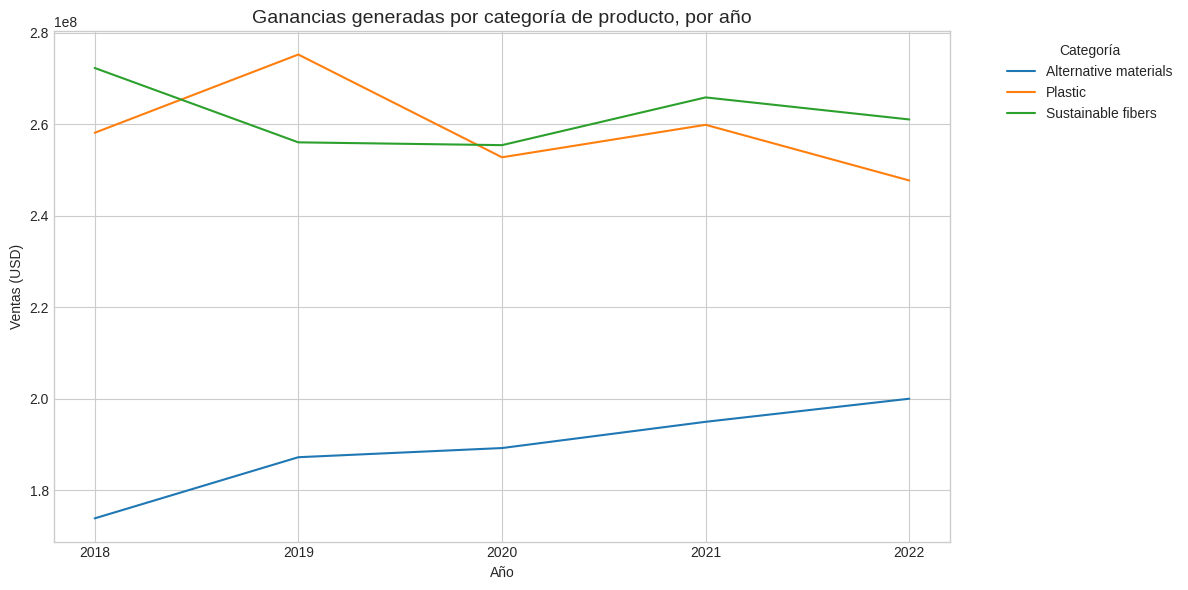

In [ ]:
#GRAFICA 10
#GRAFICA 9
#grafica 9: Ganancias generadas por categoría de producto, por año (2018–2022)

# Asegurar numérico
df['Sales_Revenue_USD'] = pd.to_numeric(df['Sales_Revenue_USD'], errors='coerce')

# Tabla: ventas por año y categoría
tabla = (df[(df['Production_Year']>=2018) & (df['Production_Year']<=2022)]
           .groupby(['Production_Year','Category'])['Sales_Revenue_USD']
           .sum()
           .reset_index())

plt.figure(figsize=(12,6))
ax = sns.lineplot(
    data=tabla,
    x='Production_Year',
    y='Sales_Revenue_USD',
    hue='Category',
    markers=True,
    dashes=False,
    ci=None
)

# Formato de ejes/leyenda
ax.set_title('Ganancias generadas por categoría de producto, por año', fontsize=14)
ax.set_xlabel('Año')
ax.set_ylabel('Ventas (USD)')
ax.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar años enteros en el eje X
ax.set_xticks(sorted(tabla['Production_Year'].unique()))

plt.tight_layout()
plt.show()


### **GRAFICA 11: GEI EMITIDOS POR CATEGORIA DE PRODUCTO POR AÑO**

/tmp/ipython-input-3518689263.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/tmp/ipython-input-3518689263.py:34: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


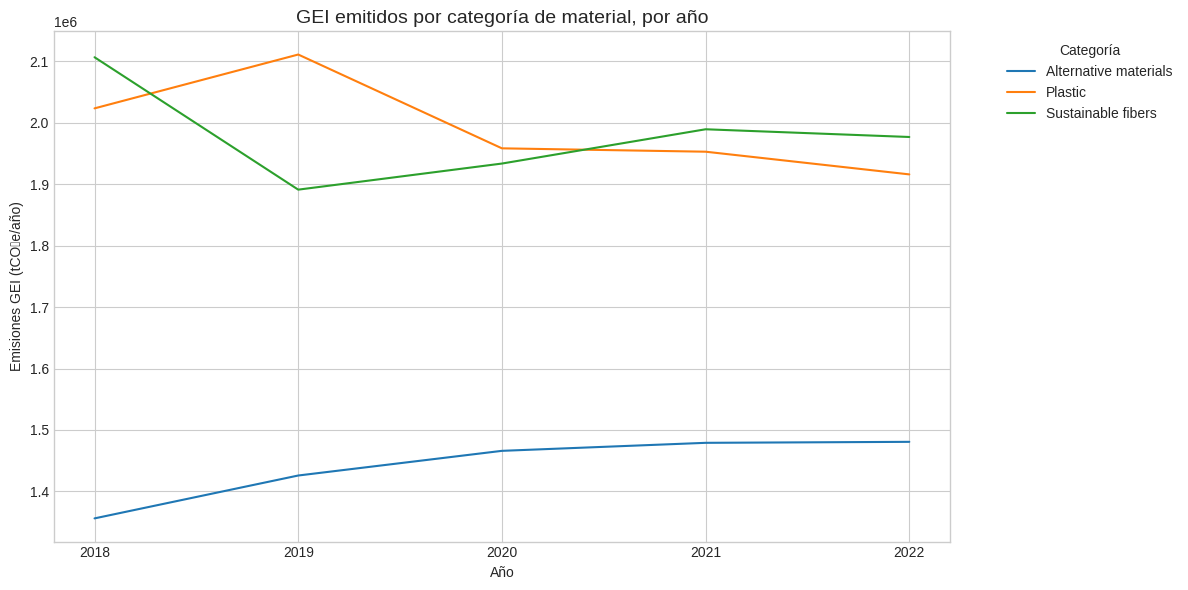

In [ ]:
#GRAFICA 11
#GRAFICA 10
#grafica 10: GEI emitidos por categoría de material, por año (2018–2022)

# Asegurar numérico
df['Greenhouse_Gas_Emissions_tCO2e_yr'] = pd.to_numeric(df['Greenhouse_Gas_Emissions_tCO2e_yr'], errors='coerce')

# Tabla: emisiones por año y categoría
tabla = (df[(df['Production_Year']>=2018) & (df['Production_Year']<=2022)]
           .groupby(['Production_Year','Category'])['Greenhouse_Gas_Emissions_tCO2e_yr']
           .sum()
           .reset_index())

plt.figure(figsize=(12,6))
ax = sns.lineplot(
    data=tabla,
    x='Production_Year',
    y='Greenhouse_Gas_Emissions_tCO2e_yr',
    hue='Category',
    markers=True,
    dashes=False,
    ci=None
)

# Formato de ejes/leyenda
ax.set_title('GEI emitidos por categoría de material, por año', fontsize=14)
ax.set_xlabel('Año')
ax.set_ylabel('Emisiones GEI (tCO₂e/año)')
ax.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar años enteros en el eje X
ax.set_xticks(sorted(tabla['Production_Year'].unique()))

plt.tight_layout()
plt.show()


### **GRAFICA 12: GENERACION DE BASURA POR CATEGORIA DE PRODUCTO POR AÑO**

/tmp/ipython-input-2441310926.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(


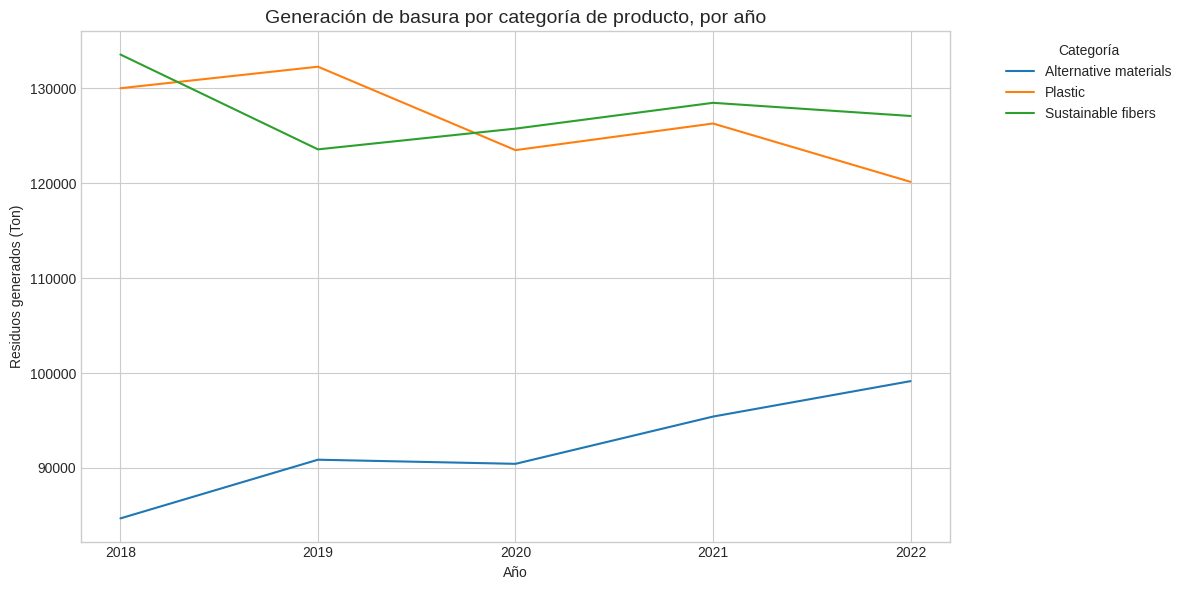

In [ ]:
#GRAFICA 12
#GRAFICA 11
#grafica 11: Generación de basura por categoría de producto, por año (2018–2022)

# Asegurar numérico
df['Waste_Generation_Ton_yr'] = pd.to_numeric(df['Waste_Generation_Ton_yr'], errors='coerce')

# Tabla: residuos por año y categoría
tabla = (df[(df['Production_Year']>=2018) & (df['Production_Year']<=2022)]
           .groupby(['Production_Year','Category'])['Waste_Generation_Ton_yr']
           .sum()
           .reset_index())

plt.figure(figsize=(12,6))
ax = sns.lineplot(
    data=tabla,
    x='Production_Year',
    y='Waste_Generation_Ton_yr',
    hue='Category',
    markers=True,
    dashes=False,
    ci=None
)

# Formato de ejes/leyenda
ax.set_title('Generación de basura por categoría de producto, por año', fontsize=14)
ax.set_xlabel('Año')
ax.set_ylabel('Residuos generados (Ton)')
ax.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar años enteros en el eje X
ax.set_xticks(sorted(tabla['Production_Year'].unique()))

plt.tight_layout()
plt.show()


### **GRAFICA 13: CONSUMO DE AGUA POR CATEGORIA DE PRODUCTO POR AÑO**

/tmp/ipython-input-4254297088.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(


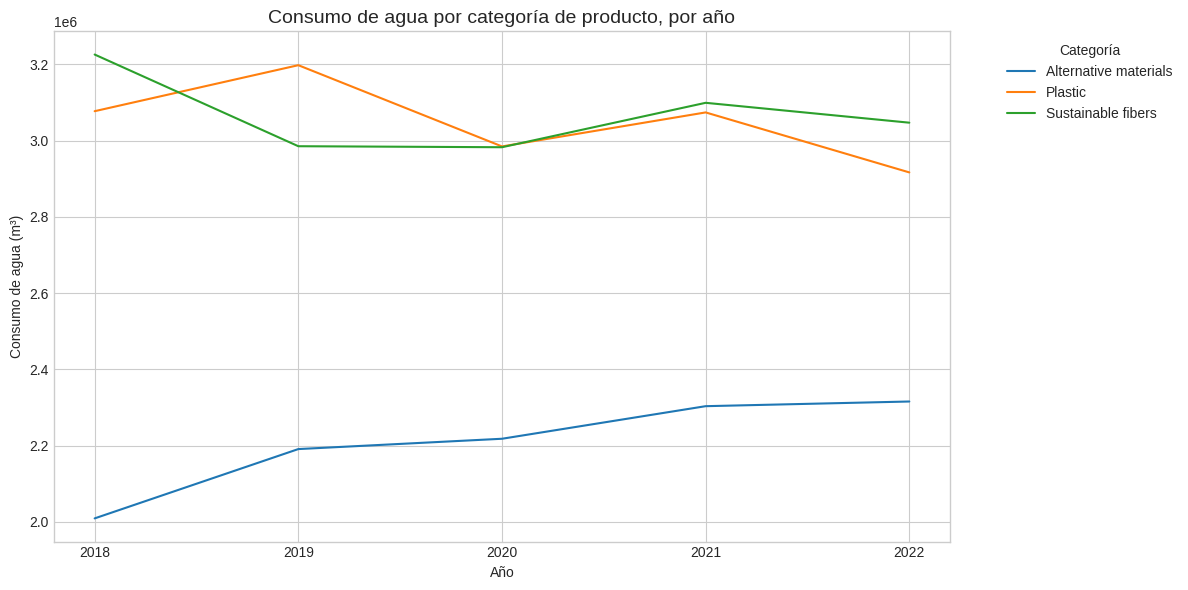

In [ ]:
#GRAFICA 13
#GRAFICA 12
#grafica 12: Consumo de agua por categoría de producto, por año (2018–2022)

# Asegurar numérico
df['Water_Consumption_M3_yr'] = pd.to_numeric(df['Water_Consumption_M3_yr'], errors='coerce')

# Tabla: consumo de agua por año y categoría
tabla = (df[(df['Production_Year'] >= 2018) & (df['Production_Year'] <= 2022)]
           .groupby(['Production_Year', 'Category'])['Water_Consumption_M3_yr']
           .sum()
           .reset_index())

plt.figure(figsize=(12,6))
ax = sns.lineplot(
    data=tabla,
    x='Production_Year',
    y='Water_Consumption_M3_yr',
    hue='Category',
    markers=True,
    dashes=False,
    ci=None
)

ax.set_title('Consumo de agua por categoría de producto, por año', fontsize=14)
ax.set_xlabel('Año')
ax.set_ylabel('Consumo de agua (m³)')
ax.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticks(sorted(tabla['Production_Year'].unique()))

plt.tight_layout()
plt.show()
